In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Read this First

#### Remember that `tab` is is useful for autocompletion.

#### Remember that `shift + tab` is useful for rapidly obtaining usage + documentation.

### **Convolutions in 1D**

**We learnt about the convolution operation in lecture, and now it's time you implemented your own convolution operation, and explore some of its properties.**

**Before we try and write our own simple convolution function, let's see an example using numpy. Create two random 1D numpy arrays called f and h, of length 10 and 3, with integer values ranging between 0 and 9 (inclusive). Print them.**

In [28]:
f = np.random.randint(low=0 , high=10, size=(10), dtype=np.int64)
h = np.random.randint(low=0 , high=10, size=(3), dtype=np.int64)
print('f: ',f)
print('h: ',h)

f:  [2 8 5 5 5 1 0 0 7 4]
h:  [5 5 4]


**We can then use numpy's convolution operation to perform a simple convolution. Please use numpy.convolve to perform the operation f∗h. Make sure that you set the mode of the convolve operation to 'valid'. Print the result and the shape of the result.**

In [29]:
result = np.convolve(f, h, mode='valid')
print(result)
print(result.shape)

[73 82 70 50 25  4 35 55]
(8,)


**Is the shape what you expected? Why is this the shape of the resulting array?**

Yes, beause in valid mode python does not do padding, the length should be max(len(f) , len(h)) - min(len(f) , len(h)) + 1
The convolution product only works on points that the signals overlap completely

**Perform the operation f∗h again using numpy's convolve function, but this time without the mode argument. Print the resulting signal and the shape.**

In [30]:
result = np.convolve(f, h)
print(result)
print(result.shape)

[10 50 73 82 70 50 25  4 35 55 48 16]
(12,)


**Notice that the shape is different now, and it is larger than f or h. Why is this so?**

Because the default mode is 'full' , it operates convolution product at each point of overlap, so the length is len(f)+len(h)-1

**Now that we've been able to use numpy's convolution function to convolve two signals, let's implement our own. Implement the convolution_1D function below by filling in the indices to signal and kernel, to perform the same operation that numpy.convolve does with the default mode. Make sure that the output is what is expected.**

In [31]:
def convolution_1D(signal, kernel):
  """ Performs the convolution operation f ∗ h.
      Args: 
          f: A 1D numpy array with length [n]
          h: A 1D numpy array with length [m]
  """

  total_len = len(signal) + len(kernel) - 1
  result = np.zeros(total_len)

  for n in range(total_len):
    
    # For indexing to make sure that we only care about overlaps in range
    kmin = max(0, n - (len(kernel) - 1))
    kmax = min(n, len(signal) - 1)
    
    for k in range(kmin, kmax + 1):
      # Fill in the indices to signal and that represent the convolution operation
      result[n] += signal[k] * kernel[n-k]
    
  return result
      
g = convolution_1D(f, h)
print(g)
print(g.shape)

[10. 50. 73. 82. 70. 50. 25.  4. 35. 55. 48. 16.]
(12,)


**We see that both the default mode and valid mode for convolution changes the size of the input signal array. Sometimes that's nice, but often we want the output signal to be the same size as the input signal. Perform the operation f∗h using numpy.convolve, with the mode argument as 'same'. Print its contents and shape.**

In [32]:
result = np.convolve(f, h, mode = "same")
print(result)
print(result.shape)

[50 73 82 70 50 25  4 35 55 48]
(10,)


### **Convolutions in 2D**

**We've just seen convolution in 1D by implementing our own simple convolution function, and also used numpy's convolve function. Now we want to do the same with 2D convolution. Unfortunately numpy doesn't have a built-in function for 2D convolution, so we'll use scipy instead.**

**Create a 5x5 2D array called image that is filled with ones with dtype=int. Create a 3x3 2D array called kernel that filled with ones with dtype=int. Print them.**

In [33]:
image = np.ones((5,5),dtype = int)
kernel = np.ones((3,3),dtype = int)
print(image)
print(kernel)


[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


**Now using scipy's convolve2d, perform a convolution between the image and the kernel above. Do so using the mode 'full', then 'valid', then 'same'. Print the resulting matrices and their respective shapes.**

In [34]:
from scipy import signal

result = signal.convolve2d( image , kernel ,mode = 'full' )
print(result)
print(result.shape)

result = signal.convolve2d( image , kernel ,mode = 'valid' )
print(result)
print(result.shape)

result = signal.convolve2d( image , kernel ,mode = 'same' )
print(result)
print(result.shape)




[[1 2 3 3 3 2 1]
 [2 4 6 6 6 4 2]
 [3 6 9 9 9 6 3]
 [3 6 9 9 9 6 3]
 [3 6 9 9 9 6 3]
 [2 4 6 6 6 4 2]
 [1 2 3 3 3 2 1]]
(7, 7)
[[9 9 9]
 [9 9 9]
 [9 9 9]]
(3, 3)
[[4 6 6 6 4]
 [6 9 9 9 6]
 [6 9 9 9 6]
 [6 9 9 9 6]
 [4 6 6 6 4]]
(5, 5)


**Observe that the shapes are all different due to the way we handle boundary conditions and padding. Why are the values outside of the central 3x3 grid less than 9?**

because only a part of the image and the kernel are overlaped 

**We can also play around with what values we use for padding. Run the convolve2d operation again, this time with mode set as 'same' and fillvalue set as -1, and print out the result, observing the difference compared to when the fillvalue was the default 0.**

In [35]:
result = signal.convolve2d( image , kernel ,mode = 'same', fillvalue = -1 )
print(result)
print(result.shape)

[[-1  3  3  3 -1]
 [ 3  9  9  9  3]
 [ 3  9  9  9  3]
 [ 3  9  9  9  3]
 [-1  3  3  3 -1]]
(5, 5)


the value in every grid is the number of overlapping grids - nonoverlapping grids in a kernel

**Using the same image and kernel, perform a convolve2d operation, this time with mode set as 'same' and boundary set as 'symm', and another convolve2d operation, this time with mode set as 'same' and fillvalue set as 1. Print the results.**

In [36]:
result = signal.convolve2d( image , kernel ,mode = 'same', boundary = 'symm' )
print(result)
print(result.shape)

result = signal.convolve2d( image , kernel ,mode = 'same', fillvalue = 1 )
print(result)
print(result.shape)

[[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]
(5, 5)
[[9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]
 [9 9 9 9 9]]
(5, 5)


**Why are the results the same?**

because they are both filling the boundary with 1

In [37]:
img = np.array([[0,1,1,0],[1,1,1,2],[1,1,1,1], [0,1,1,0] ],dtype = int)
k = np.ones((3,3),dtype = int)
res = signal.convolve2d( img, k ,mode = 'same', boundary = 'symm' )
print(res)

[[5 7 8 7]
 [7 8 9 9]
 [7 8 9 9]
 [5 7 7 5]]


### **Smoothing Kernels in 2D**

**So why are convolutions used? A major application for convolutions is for image filtering, of which smoothing is quite common.**

**Let's first get an image we can play with. Similar to the first week's notebook, if you aren't able to access your webcam, or you are running on Colab, then you can instead place an image in your local directory with the name testimg.jpg.**

(480, 640, 3)


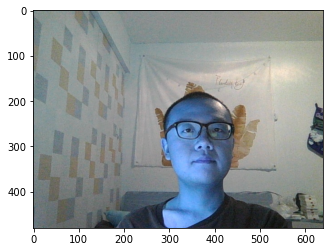

In [38]:
import cv2
cap = cv2.VideoCapture(0)
if not (cap.isOpened()):
    print('Could not open video device')
else:
  ret, frame = cap.read()
  cv2.imwrite('testim.jpg',frame)

frame = cv2.imread('testim.jpg')
plt.imshow(frame)
print(frame.shape)

**Using cv2 we can resize the image so it's around 400 x 400, since convolution takes a little longer if the images are too big, and if the images are too small, it's hard to see the difference. We also grayscale the image.** 

(400, 300)


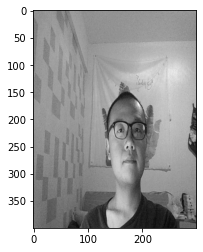

In [39]:
def_width = 400
def_height = (frame.shape[0] * def_width) // frame.shape[1]

frame = cv2.resize(frame, dsize=(def_height, def_width), interpolation=cv2.INTER_CUBIC)
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_frame, cmap='gray')
print(gray_frame.shape)

**We saw in class that one of the filters used is a box filter. Let's try and implement that. Create a 2d box filter of size 20 x 20. Convolve your grayscaled image with this box filter (from here on out we default to mode = 'same') and plot the results.**

[[0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 

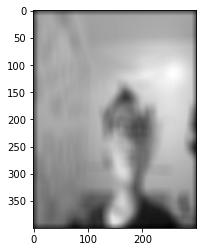

In [40]:
box_filter = np.ones((20,20),dtype = np.float32)
box_filter = box_filter /(20*20)
print(box_filter)
result = signal.convolve2d( gray_frame , box_filter ,mode = 'same')
plt.imshow(result, cmap='gray')


**Observe that indeed there is blurring, but also notice the boxy artifacts present because of the box filter. We talked about in lecture how a gaussian filter would not have these artifacts. Below is a simple function for creating a 2D gaussian kernel.** 

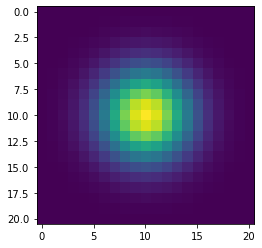

In [41]:
def gaussian_kern(kernel_size=21, sigma=3):
    """Returns a 2D Gaussian kernel."""

    gkern1d = signal.gaussian(kernel_size, std=sigma).reshape(kernel_size, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

plt.imshow(gaussian_kern())

**Using the above function, create a kernel of size 21 with sigma as 7, and then convolve that with your image. Plot the result**

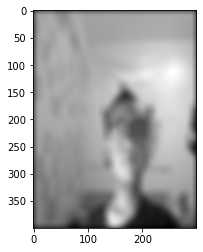

In [42]:
kernel = gaussian_kern(21, 7)
result = signal.convolve2d( gray_frame , kernel ,mode = 'same')
plt.imshow(result, cmap='gray')

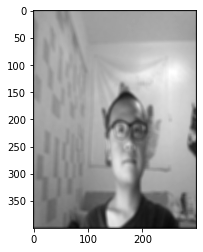

In [43]:
kernel = gaussian_kern(7, 7)
result = signal.convolve2d( gray_frame , kernel ,mode = 'same')
plt.imshow(result, cmap='gray')

**Observe how there are no blocky artifacts seen in this filtered image, since we are using a gaussian kernel instead of a box filter. Play around by changing the gaussian kernel size, and also the sigma of the kernel. What does changing either of the values do?**

greater kernel size or sigma will make the picture more blurring

**Note that gaussian filtering is a common enough operation that scipy already has an implementation of this. Using scipy.ndimage.gaussian_filter, perform filtering using sigma=7, and plot the resulting image.**

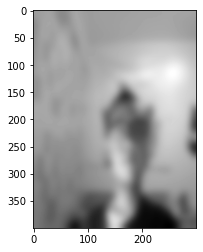

In [44]:
from scipy.ndimage import gaussian_filter
result = gaussian_filter(gray_frame, sigma=7)
plt.imshow(result, cmap='gray')

**Something interesting about gaussian filtering is that because of the associativity property of convolutions, successive gaussian blurring operations are the same as a single, larger gaussian blur operation. The equation (which you could try and prove yourself) is $\sigma=\sqrt(\sigma_1^2 + \sigma_2^2)$**

**Below, filter your grayscaled image via scipy's gaussian filter function in two different ways. For the first method, filter your image twice, the first time with a sigma=6, and then with a sigma=8. For the second method, filter the grayscaled image once, with sigma=10**

**Compare the results by plt.imshow(first_method - second_method), followed by plt.colorbar() to confirm that the difference is insignificant.**

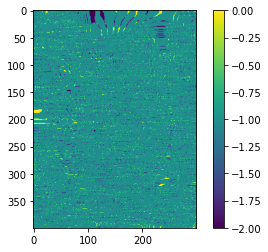

In [45]:

result1 = np.array(gaussian_filter(gaussian_filter(gray_frame, sigma=6), sigma=8),dtype = np.float)

result2 = np.array(gaussian_filter(gray_frame, sigma=10),dtype = np.float)

result = result1-result2
plt.imshow(result)
plt.colorbar()

### **Convolution Properties**

**Let's demonstrate numerically some properties of the convolution operation. Create:**

*   f: 1D array of size 8 of random integers from 0 to 9 (inclusive)
*   h: 1D array of size 8 of random integers from 0 to 9 (inclusive)
*   g: 1D array of size 5 of random integers from 0 to 9 (inclusive)
*   f2: 2D array of size 5x5 of random integers from 0 to 9 (inclusive)
*   h2: 2D array
 of size 3x3 of random integers from 0 to 9 (inclusive)
*   g2: 2D array of size 4x4 of random integers from 0 to 9 (inclusive)


In [46]:
f = np.random.randint(low=0 , high=10, size=(8), dtype=np.int64)
h = np.random.randint(low=0 , high=10, size=(8), dtype=np.int64)
g = np.random.randint(low=0 , high=10, size=(5), dtype=np.int64)
f2 = np.random.randint(low=0 , high=10, size=(5,5), dtype=np.int64)
h2 = np.random.randint(low=0 , high=10, size=(3,3), dtype=np.int64)
g2 = np.random.randint(low=0 , high=10, size=(4,4), dtype=np.int64)

**First we want to show numerically that the convolution operation is commutative. Use numpy.convolve to perform the operation f∗h, and the operation h∗f. Print both results. Use np.all to make sure that all values are identical.**

In [47]:
res1 = np.convolve(f,h)
res2 = np.convolve(h,f)
print(res1)
print(res2)
print((res1==res2).all())

[ 56 103  61  34 101 176 160 165 121  92  99 115  85  47  28]
[ 56 103  61  34 101 176 160 165 121  92  99 115  85  47  28]
True


**We can also show numerically that the convolution operation is associative. Use numpy.convolve to perform the operation f∗h∗g in two different ways. For the first way, first do h∗g, then convolve the result of that with f. For the second way, first do f∗h, then convolve the result of that with g. Print both results, and use np.all to make sure that all values are identical.**

In [48]:
res1 = np.convolve(np.convolve(h,g) , f)
res2 = np.convolve(np.convolve(f,h) , g)
print(res1)
print(res2)
print((res1==res2).all())

[ 224  916 1507 1471 1889 2927 3481 3765 4366 4511 3885 3751 3334 2768
 2281 1824 1074  507  252]
[ 224  916 1507 1471 1889 2927 3481 3765 4366 4511 3885 3751 3334 2768
 2281 1824 1074  507  252]
True


**We see that the results are identical, thereby showing that convolutions are commutative and associative. Prove numerically the same thing in 2D, using the f2, h2, and g2 formed previously, and scipy's convolve2d function.**

In [49]:
res1 = signal.convolve2d(f2,h2)
res2 = signal.convolve2d(h2,f2)
print(res1)
print(res2)
print((res1==res2).all())

[[  0   8  52  73  79  75  25]
 [  8  64 133 191 170 156  60]
 [ 12  95 182 189 153 139  77]
 [ 36 100 168 169 116 113 117]
 [ 25  97 184 150 150  75  72]
 [ 29  44 104 100  71  24   0]
 [ 15  27  12   9   0   0   0]]
[[  0   8  52  73  79  75  25]
 [  8  64 133 191 170 156  60]
 [ 12  95 182 189 153 139  77]
 [ 36 100 168 169 116 113 117]
 [ 25  97 184 150 150  75  72]
 [ 29  44 104 100  71  24   0]
 [ 15  27  12   9   0   0   0]]
True


In [50]:
res1 = signal.convolve2d( signal.convolve2d(h2,g2) , f2)
res2 = signal.convolve2d( signal.convolve2d(f2,h2) , g2)
print(res1)
print(res2)
print((res1==res2).all())

[[    0    32   216   384   673   900   789   637   350    75]
 [   32   328  1124  2309  3169  3917  3290  2199  1268   330]
 [  112  1008  2771  4822  6488  7382  6368  4114  2608   816]
 [  272  1648  4507  7239  9059 10297  9148  5825  4021  1528]
 [  500  2521  5835  8834 11071 11635 10556  6507  4071  2031]
 [  556  2558  6201  8685 10123 10609  8718  5375  3007  2024]
 [  680  2251  4582  6674  7376  7484  6208  3896  1826  1467]
 [  436  1565  3155  4092  4488  4573  3390  2265   741   504]
 [  292   708  1314  2019  1882  1552   949   497   168     0]
 [  120   321   285   261   252    84    63     0     0     0]]
[[    0    32   216   384   673   900   789   637   350    75]
 [   32   328  1124  2309  3169  3917  3290  2199  1268   330]
 [  112  1008  2771  4822  6488  7382  6368  4114  2608   816]
 [  272  1648  4507  7239  9059 10297  9148  5825  4021  1528]
 [  500  2521  5835  8834 11071 11635 10556  6507  4071  2031]
 [  556  2558  6201  8685 10123 10609  8718  5375  300

**We saw in class that convolutions can be computed by reversing the kernel, and sliding it over the signal and taking the dot product at all locations. Though this is simple to implement and understand, it is slow for larger arrays.**

**What we can use is the Fast Fourier Transform to compute the convolution. One of the most important properties to know is that convolution in the time domain is multiplication in the frequency domain. Since multiplication can be done much faster than convolution, we can perform a convolution by moving the signal and kernel to the frequency domain, multiplying them, and then moving them back to the time domain.**

**Though this would be cool to implement, this is outside the scope of the class, so instead we'll use scipy's fftconvolve to show how much faster it is.**

**Create a 1D array of length 1,000,000 of random numbers, and a kernel of size 10,000 also of random numbers. Convolve them using signal.convolve with method='direct'**

In [51]:
from scipy import signal
import time

array1 = np.random.uniform(low=0 , high=1000, size=(1000000))
kernel = np.random.uniform(low=0 , high=1000, size=(100000))
start = time.time()
# Do the convolution here
signal.convolve(array1,kernel ,method='direct')
print("This took ", time.time() - start, " seconds")

This took  14.809148073196411  seconds


**Notice the amount of time that took. If it didn't take long, increase the size of the arrays so that it takes a couple of seconds. Now repeat it with method='fft'**

In [52]:
array1 = np.random.uniform(low=0 , high=1000, size=(10000000))
kernel = np.random.uniform(low=0 , high=1000, size=(100000))

start = time.time()
# Do the convolution here:

signal.convolve(array1,kernel, method = 'fft')
print("This took ", time.time() - start, " seconds")

This took  1.222454309463501  seconds


**Notice how much faster it was using FFT to perform the convolution. Besides explicitly setting the method to 'fft', scipy also has scipy.signal.fftconvolve that defaults to using FFT.**

### **Median Filtering**

**Instead of doing an averaging using a gaussian or box filter, another type of filtering called median filtering exists. It's useful for removing salt and pepper noise in images, which gaussian blurring isn't quite able to remove.**

**Let's create an image with some salt and pepper noise. Create a 2D array of zeros of size 50 by 50. Set around 5% of the pixels randomly to be 255 in value. Plot it.**

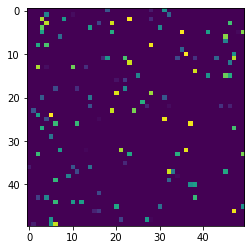

In [55]:
import random
image = np.zeros((50,50),dtype = np.int)
x,y = np.where(image <=1)
numbers = range(0,len(x))
selected_pos = random.sample(numbers , len(x)//20 )
for i in range(0 , len(selected_pos) ):
    image[ x[ selected_pos[i] ] ,y[ selected_pos[i] ] ] = random.randint(0,256)
plt.imshow(image)

**Now try and remove the noise via gaussian blurring. Try a variety of sigmas to see whether the noise can be removed**

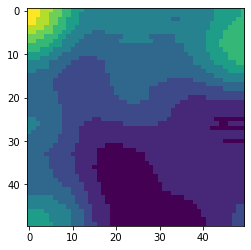

In [57]:
result = gaussian_filter(image, sigma=7 )
plt.imshow(result)

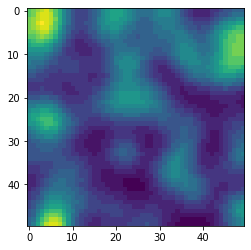

In [58]:
result = gaussian_filter(image, sigma=3 )
plt.imshow(result)

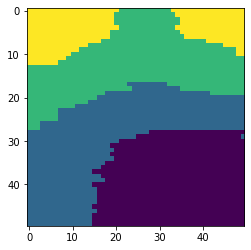

In [59]:
result = gaussian_filter(image, sigma=14 )
plt.imshow(result)

**Now, try use median filtering. Scipy.ndimage has a nice implementation for you to use. Plot the results.**

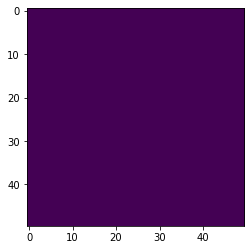

In [61]:
from scipy.ndimage import median_filter
result = median_filter(image,size = 5)
plt.imshow(result)

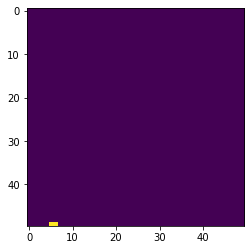

In [62]:
result = median_filter(image,size = 3)
plt.imshow(result)

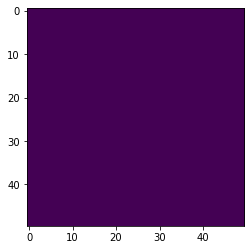

In [63]:
result = median_filter(image,size = 4)
plt.imshow(result)

**Feel free to play around with the noise level and the median filter size to see what the relationship is.**

greater median filter size has lower noise level